# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ques">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that I have selected for investigating is a dataset that contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue.
>
<a id='ques'></a>
## Questions

1. These are the following questions I want to analyze using this dataset:
    - Which genres are receiving higher user ratings?
    - What kinds of properties are associated with movies that have high revenues? 
    - Does higher budget movies have higher user ratings?

In [19]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.
### General Properties

In [20]:
# load data
file_path = 'tmdb_movies.csv'
movie_df = pd.read_csv(file_path)

In [21]:
# view data
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# shape of the data
print('Number of Movies: {}'.format(movie_df.shape[0]))
print('Number of Movie Attributes: {}'.format(movie_df.shape[1]))

Number of Movies: 10866
Number of Movie Attributes: 21


In [23]:
# number of nulls in each column
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

>### Observation 1
After investigating dataset for number of nulls in each column, this is what I found:
- **homepage** has `7930` nulls
- **tagline** has `2824` nulls
- **keywords** has `1493` nulls
- **cast** has `76` nulls
- **overview** has `4` nulls
- **imdb_id** has `10` nulls
- **release_date**

There are also other columns with nulls but I decided to drop these columns from my dataframe as there are lot of nulls and if you observe there are some columns with less number of nulls that I'm gonna drop as these columns are not much useful for my analysis.

And talking about the remaining nulls I'm gonna handle them in my next steps.

In [24]:
# drop homepage, tagline, keywords, overview, and imdb_id columns
drop_columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'cast']
movie_df.drop(columns = drop_columns, inplace = True)

In [25]:
# verify with shape
print('Number of Movies: {}'.format(movie_df.shape[0]))
print('Number of Movie Attributes: {}'.format(movie_df.shape[1]))

Number of Movies: 10866
Number of Movie Attributes: 14


In [26]:
# finding duplicates
movie_df[movie_df.duplicated()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0


In [27]:
movie_df.drop_duplicates(inplace = True)

In [28]:
# verify duplicates
print('Your data contains {} duplicates'.format(movie_df.duplicated().sum()))

Your data contains 0 duplicates


>### Observation 2
After inspecting for duplicates in my dataframe there is only one duplicate and I dropped it from my dataframe.

In [29]:
# finding rows with missing values
movie_df[movie_df.isnull().any(axis = 1)]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,0,0,Racing Extinction,Louie Psihoyos,90,Adventure|Documentary,NaN,36,7.8,2015,0.0,0.0
259,360603,0.476341,0,0,Crown for Christmas,Alex Zamm,84,TV Movie,NaN,10,7.6,2015,0.0,0.0
295,363483,0.417191,0,0,12 Gifts of Christmas,Peter Sullivan,84,Family|TV Movie,NaN,12,6.3,2015,0.0,0.0
298,354220,0.370258,0,0,The Girl in the Photographs,Nick Simon,95,Crime|Horror|Thriller,NaN,10,4.7,2015,0.0,0.0
328,308457,0.367617,0,0,Advantageous,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,0,0,Interiors,Woody Allen,93,Drama,NaN,35,6.3,1978,0.0,0.0
10806,24998,0.138635,0,0,Gates of Heaven,Errol Morris,85,Documentary,NaN,12,5.9,1978,0.0,0.0
10816,16378,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,76,Comedy,NaN,14,6.0,1978,0.0,0.0
10842,36540,0.253437,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,25,Animation|Family,NaN,12,7.9,1966,0.0,0.0


>### Observation 3
After inspecting the number of rows with missing values I have decided to drop them from my dataframe.

In [30]:
# drop rows with missing columns
movie_df.drop(index = movie_df[movie_df.isnull().any(axis = 1)].index, inplace = True)

In [31]:
# verfiy for missing values
print('Your data contains {} missing values'.format(movie_df.isnull().sum().sum()))

Your data contains 0 missing values


In [32]:
# inspect data types
movie_df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>### Observation 4
After inspecting for data types I decided to perform following things:
- Convert `budget`, `revenue` and `runtime` columns to floats

In [33]:
# Convert budget, revenue and runtime columns to floats
movie_df[['budget', 'revenue']] = movie_df[['budget', 'revenue']].astype(float)

In [34]:
# verify data types
movie_df.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [35]:
# Checking for consistency
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,63287.653783,0.693143,1.612525e+07,4.407785e+07,102.744340,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,90808.473021,1.035525,3.216819e+07,1.224038e+08,28.134561,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10247.500000,0.231581,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18725.500000,0.418755,1.403930e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,70586.750000,0.774232,1.900000e+07,3.064621e+07,112.000000,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [36]:
# dataframe after performing data wrangling
movie_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
# datframe shape after data wrangling
print('Dataframe contains {} number of movies after data cleaning'.format(movie_df.shape[0]))
print('Dataframe contains {} number of movie attributes after data cleaning'.format(movie_df.shape[1]))

Dataframe contains 9806 number of movies after data cleaning
Dataframe contains 14 number of movie attributes after data cleaning


>### Summary of Data Wrangling
- Initially started inspecting general properties of dataframe like `shape`, `nulls`, and `dtypes`.
- Removed the columns containing `nulls` and the columns that are not necessary for my analysis.
- Inspected for duplicates, found only `1` duplicate and dropped from the dataframe.
- Next, inspected for number of rows with `nulls` and dropped from the dataframe.
- Finally, inspected for data types and converted `budget`, `revenue` and `runtime` columns to `floats`.
- After all these data wrangling steps I ended up with `9806` rows and `14` columns.

<a id='eda'></a>
## Exploratory Data Analysis

> In this step I'll explore my data to compute statistics and create visualizations with the goal of addressing the research questions that I have posed in the Introduction section.

### Research Question 1 (Which genres are receiving higher user ratings?)

In [40]:
# top 10 genres with higher average user rating
top_10_genres = movie_df.groupby(['genres']).mean()['vote_average'].sort_values(ascending = False)[: 10]
top_10_genres

genres
Family|Animation|Fantasy                             8.0
Mystery|Documentary|Crime                            8.0
Fantasy|Drama|Crime                                  8.0
History|Drama|Thriller|War                           8.0
Romance|Comedy|Animation|Drama|Family                8.0
Animation|Drama|Fantasy                              7.9
Fantasy|Animation|Comedy|Drama                       7.9
Action|Thriller|Science Fiction|Mystery|Adventure    7.9
Science Fiction|Adventure|Drama|Fantasy              7.9
Science Fiction|Drama|Romance|Fantasy                7.8
Name: vote_average, dtype: float64

>### Action 1 for Q1
- For answering, which genres are receiving higher user ratings? I have used `groupby()` function to group by `genres` and then taking `mean()` found the average user ratings for top `10` genres.
- The below bar chart showcases the same thing visually.

In [58]:
# function for plotting horizontal bar chart
def plot_barh(arr1, arr2, xlabel, ylabel, title):
    plt.barh(top_10_genres.index, top_10_genres.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

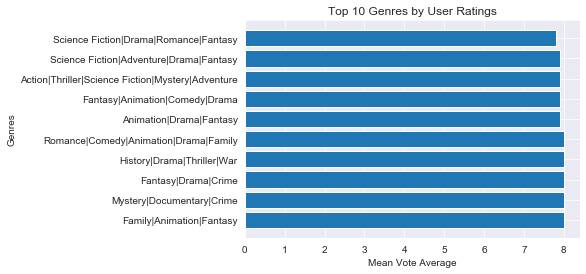

In [59]:
# plot for top 10 genres by user ratings
arr1 = top_10_genres.index
arr2 = top_10_genres.values
xlabel = 'Mean Vote Average'
ylabel = 'Genres'
title = 'Top 10 Genres by User Ratings'
plot_barh(arr1, arr2, xlabel, ylabel, title)

In [57]:
# top 10 genres based on average vote count 
top_10_genres_count = movie_df.groupby(['genres']).mean()['vote_count'].sort_values(ascending = False)[: 10]
top_10_genres_count

genres
Action|Thriller|Science Fiction|Mystery|Adventure    9767.0
Science Fiction|Adventure|Fantasy                    7080.0
Drama|Adventure|Science Fiction                      4572.0
Science Fiction|Thriller|Action|Adventure            4269.0
Adventure|Family|Animation|Action|Comedy             4185.0
Western|Drama|Adventure|Thriller                     3929.0
Fantasy|Animation|Family|Comedy                      3899.0
Crime|Comedy|Action|Adventure                        3833.0
Adventure|Comedy|Science Fiction|Family              3785.0
Action|Science Fiction|Adventure|Mystery             3729.0
Name: vote_count, dtype: float64

>### Action 2 for Q1
- Same question is answered in different angle by using `vote_count` instead of `vote_average`.
- This time the top 10 genres are different from what I got in previous step.
- The below bar chart shows the top 10 genres based on average `vote_count`

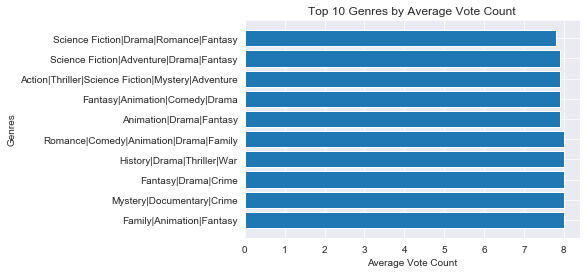

In [61]:
# plot for genres by average vote count
arr1 = top_10_genres_count.index
arr2 = top_10_genres_count.values
xlabel = 'Average Vote Count'
ylabel = 'Genres'
title = 'Top 10 Genres by Average Vote Count'
plot_barh(arr1, arr2, xlabel, ylabel, title)

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [91]:
# Average revenue_adj
movie_df.revenue_adj.mean()

56855277.83124021

In [124]:
# percentage of high and low revenue movies
high_revenue_count = movie_df[movie_df.revenue_adj > 5.705309e+07].shape[0] / movie_df.shape[0] * 100
low_revenue_count= movie_df[movie_df.revenue_adj <= 5.705309e+07].shape[0] / movie_df.shape[0] * 100

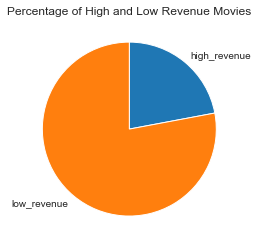

In [125]:
plt.pie([high_revenue_count, low_revenue_count], labels = ['high_revenue', 'low_revenue'], startangle = 90, counterclock = False)
plt.title('Percentage of High and Low Revenue Movies');

In [126]:
high_revenue_count, low_revenue_count

(22.047725882112992, 77.95227411788701)

Before investigating further I found the percentage of high and low revenue movies.
- Percentage of high revenue movies is `22.05%`.
- Percentage of low revenue movies is `77.95%`.

>### Action 1 for Q2
- In order to investigate, what kind of properties are associated with movies that have high revenues? I'm gonna calculate and visual various properties. 
- To do so I found `2` segments of data as `high_revenue` and `low_revenue` based on `mean` value of `revenue_adj`.

In [97]:
# Mean vote average based on revenue(high and low)
high_votes_mean = movie_df[movie_df.revenue_adj > 5.705309e+07].vote_average.mean()
low_votes_mean = movie_df[movie_df.revenue_adj <= 5.705309e+07].vote_average.mean()

>### Action 2 for Q2
- Based on the mean of `revenue_adj` the following things are performed:
    - I have calculated `high_votes_mean` which is the average user rating for movies generating `revenue_adj` greater than `mean` of `revenue_adj`.
    - I also calculated `low_votes_means` which is the the average user rating for movies generating `revenue_adj` less than `mean` of `revenue_adj`.
- Below is the bar chart showcasing the same thing.

In [98]:
# function for plotting bar chart with given parameters
def plot_chart(locations, labels, heights, xlabel, ylabel, title, width):
    plt.bar(locations, heights, tick_label = labels, width = 0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

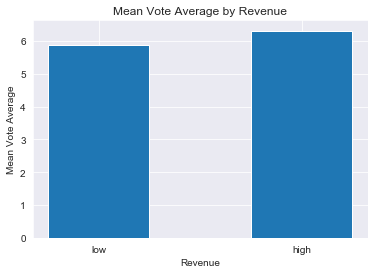

In [99]:
locations = [1, 2]
labels = ['low', 'high']
heights = [low_votes_mean, high_votes_mean]
xlabel = 'Revenue'
ylabel = 'Mean Vote Average'
title = 'Mean Vote Average by Revenue'
plot_chart(locations, labels, heights, xlabel, ylabel, title, width = 0.5)

>### Conclusion 1 for Q2
- Based on the above bar chart for `Mean Vote Average by Revenue` it is found that movies with higher revenue have higher user ratings than the movies with lower revenue.

In [100]:
high_votes_count = movie_df[movie_df.revenue_adj > 5.705309e+07].vote_count.mean()
low_votes_count = movie_df[movie_df.revenue_adj <= 5.705309e+07].vote_count.mean()

>### Action 3 for Q2
- Based on the mean of `revenue_adj` the following things are performed:
    - I have calculated `high_votes_counts` which is the average vote count for movies generating `revenue_adj` greater than `mean` of `revenue_adj`.
    - I also calculated `low_votes_counts` which is the the average vote count for movies generating `revenue_adj` less than `mean` of `revenue_adj`.
- Below is the bar chart showcasing the same thing.

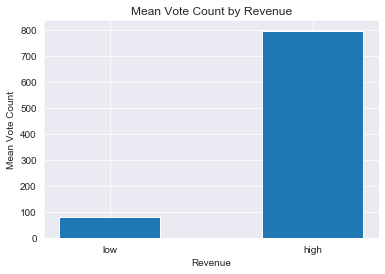

In [101]:
locations = [1, 2]
labels = ['low', 'high']
heights = [low_votes_count, high_votes_count]
xlabel = 'Revenue'
ylabel = 'Mean Vote Count'
title = 'Mean Vote Count by Revenue'
plot_chart(locations, labels, heights, xlabel, ylabel, title, width = 0.5)

>### Conclusion 2 for Q2
- Based on the above bar chart for `Mean Vote Count by Revenue` it is found that movies with higher revenue have higher vote counts than the movies with lower revenue.

In [102]:
high_popularity = movie_df[movie_df.revenue_adj > 5.705309e+07].popularity.mean()
low_popularity = movie_df[movie_df.revenue_adj <= 5.705309e+07].popularity.mean()

>### Action 4 for Q2
- Based on the mean of `revenue_adj` the following things are performed:
    - I have calculated `high_popularity` which is the average popularity for movies generating `revenue_adj` greater than `mean` of `revenue_adj`.
    - I also calculated `low_popularity` which is the the average popularity for movies generating `revenue_adj` less than `mean` of `revenue_adj`.
- Below is the bar chart showcasing the same thing.

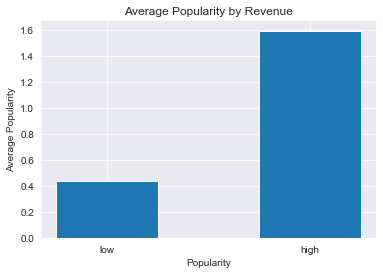

In [103]:
locations = [1, 2]
labels = ['low', 'high']
heights = [low_popularity, high_popularity]
xlabel = 'Popularity'
ylabel = 'Average Popularity'
title = 'Average Popularity by Revenue'
plot_chart(locations, labels, heights, xlabel, ylabel, title, width = 0.5)

>### Conclusion 3 for Q2
- Based on the above bar chart for `Average Popularity by Revenue` it is found that movies with higher revenue have higher popularity than the movies with lower revenue.

### Research Question 3  (Does higher budget movies have higher user ratings?)

In [127]:
# Average budget_adj 
movie_df.budget_adj.mean()

19350695.509587873

In [131]:
# Mean vote average by budget for low and high revenue movies
high_budget_votes = movie_df[movie_df.budget_adj > 1.935070e+07].vote_average.mean()
low_budget_votes = movie_df[movie_df.budget_adj <= 1.935070e+07].vote_average.mean()

>### Action 1 for Q3
- Based on the mean of `budget_adj` the following things are performed:
    - I have calculated `high_budget_votes` which is the average user ratings for movies with `budget_adj` greater than `mean` of `budget_adj`.
    - I also calculated `low_budget_votes` which is the the average user ratings for movies with `budget_adj` less than `mean` of `budget_adj`.
- Below is the bar chart showcasing the same thing.

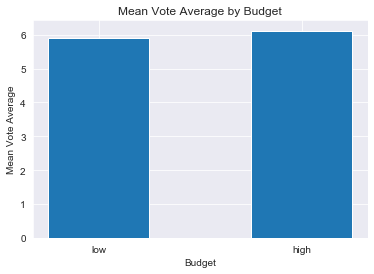

In [132]:
locations = [1, 2]
labels = ['low', 'high']
heights = [low_budget_votes, high_budget_votes]
xlabel = 'Budget'
ylabel = 'Mean Vote Average'
title = 'Mean Vote Average by Budget'
plot_chart(locations, labels, heights, xlabel, ylabel, title, width = 0.5)

>### Conclusion 1 for Q3
- Based on the above bar chart for `Mean Vote Average by Budget` it is found that movies with higher budget have higher user ratings than the movies with lower revenue.